# Model Evaluation & Fitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## 1 - Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
boston=pd.read_csv('./data/Boston.csv')
boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [3]:
# Your plots here
boston.corr()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


<AxesSubplot:xlabel='ptratio', ylabel='medv'>

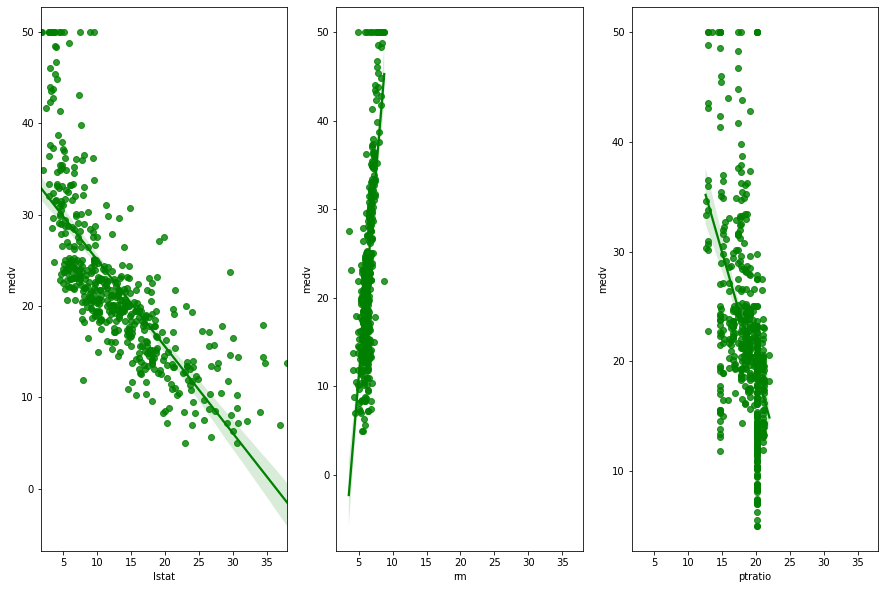

In [4]:
f, axes = plt.subplots(1, 3, figsize=(15, 10), sharex=True)
sns.regplot(x=boston['lstat'], y=boston['medv'], color="g",ax=axes[0])
sns.regplot(x=boston['rm'], y=boston['medv'], color="g",ax=axes[1])
sns.regplot(x=boston['ptratio'], y=boston['medv'], color="g",ax=axes[2])

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

### Your response here

source: https://www.kaggle.com/c/boston-housing

The first graph represents the relation between lower status of the population (percent) and the value of the house. As expected, as the lower status of the population increases, the value of the houses decrease.

The second graph represents the relation between the number of rooms per dwelling and the value of the house. As the number of rooms increase, the value on the house also increases.

The last graph represents the relation between pupil-teacher ratio by town. I was expecting that the lower the pupil-teach ratio the lower the value of the houses in the region. The linear regression, actually shows the opposite. The bigger the ptratio, the lower the house values are.


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

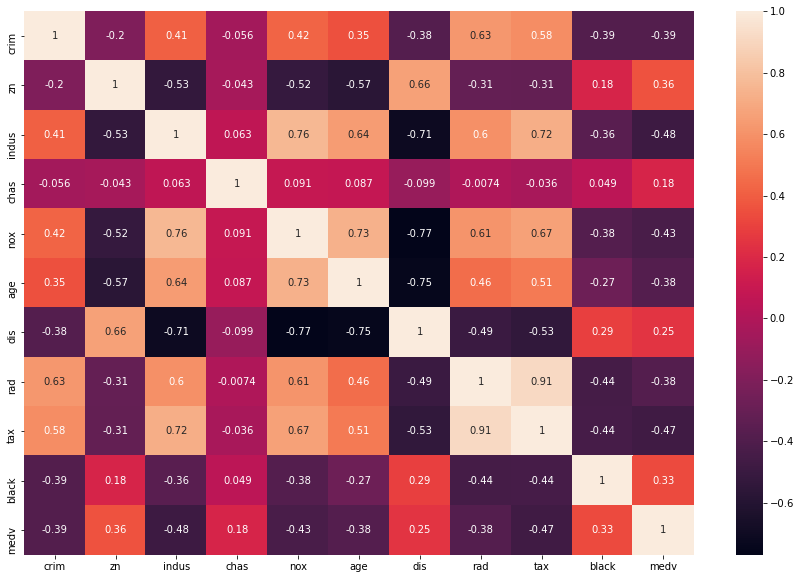

In [5]:
# Your response here
f, axes = plt.subplots(1, 1, figsize=(15, 10), sharex=True)
sns.heatmap(boston[['crim','zn','indus','chas','nox','age','dis','rad','tax','black','medv']].corr(),annot=True)

#### Significant correlations

* nox - indus
* indus - tax
* age - tax
* tax - rad
* zn - dis

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [6]:
# Your code here
boston.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


----

## 2- Developing a Model

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [7]:
boston.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [8]:
# Your code here
from sklearn.model_selection import train_test_split

X=boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y=boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

----

## 3-Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [9]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor
train=[]
test=[]
for i in range(1,30,2):
    regr = RandomForestRegressor(max_depth=i)
    regr.fit(X_train, y_train)
    train.append(regr.score(X_train,y_train))
    test.append(regr.score(X_test,y_test))

Now, plot the score for each tree on the training set and on the testing set.

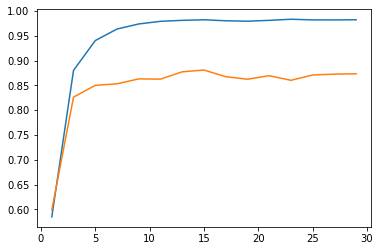

In [10]:
# Produce a plot with the score for the testing and training for the different max depths
plt.plot(range(1,30,2),train)
plt.plot(range(1,30,2),test)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

#### Your response here

As the depth increases, the score of the model increases. However, when the model is trained with the maximum depth of 6 or higher, the score stabilizes.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

### Your response here

When the model is trained with a maximum depth of 1, the model suffers from high bias.When the model is trained with a maximum depth of 10, the model suffers with low bias and high variance.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [11]:
regr = RandomForestRegressor(max_depth=6)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=6)

In [12]:
regr.score(X_test,y_test)

0.8536094690620222

#### Your response here

The max__depth would be 6. The model presents an 82% score.

#### Use the mean absolute error (MAE) to calculate the performance of the model

In [13]:
y_pred=regr.predict(X_test)
mean_absolute_error(y_test, y_pred)

2.361998902025803

#### Use the root mean squared error (RMSE) to calculate the performance of the model

In [14]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rmse

3.3352844848782337

#### Create a function that calculates  and returns the r2 score as performance metric

In [15]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

#### Calculate the r2 score of the model using the function defined above

In [16]:
#your code here
performance_metric(y_test,y_pred)

0.8536094690620222

#### Bonus question
Read [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) 
about the differences between MAE and RMSE. Do you think that one of the two types of error is more appropriate for this problem, and why?

By design RMSE gives more weight to large errors while MAE gives equal weight to all errors. So in cases where being off target by large margins is particularly bad for the business RMSE could be a better choice. In this particular situation of house price prediction I would go for the MAE because it is ok to give equal weight to all errors. In addition MAE is easier to interpret and explain than RMSE.

#### Calculate the r2 score of the model using the function defined above

In [17]:
performance_metric(y_test, y_pred)

0.8536094690620222

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

#### Your response here

* You can gather some general insights about what could influence values of the houses today. However, in a practical sense, data from 1978 is not significantly relevant. The global principles of 1978 are not the same as today.
* No, there are almost no features on the physical attributes of the houses.
* No, I don't believe so. Considering the description of the features, a rural city would have completely different data points.